# Absorción y Scattering

## 1. Absorción y Scattering


Cuando un haz de radiación incide sobre un tejido biológico se producen una serie de fenómenos ópticos impotantes tales como la reflexión y refracción en la interfase aire-tejido, la absorción por las atomos y moleculas que constituyen el tejido, y  el espacimiento o scattering de la radiación  pproducido por las partículas de diferentes tamaño o los cambios locales de índice de refracción.  Eventualmente, ciertas moléculas pueden absorber fotones de una cierta longitud de onda y re-emitir radiación en longitud de onda más larga, fenómeno conocido como fluorescencia.   En la figura se muestra un resumen de todos estos procesos ópticos que son importantes para la obtención de información sobre el esta del tejido.

![absorcionscatt](figabsorcionscattering_1.png)

## 2. Coeficiente de absorción de  un tejido 

Los cromóforos más relevantes en un tejido biológico son los siguientes:
* **UV**: proteínas, vitaminas,  NADH ...
* **Visible**: Oxihemoglobina, deoxihemoglobina, bilirrubina, caroteno, melanina y  flavinas...
* **IR**: Agua y lípidos

In [1]:
#Este programa representa los coeficientes de absorción de varios cromóforos
import numpy as np
import matplotlib.pyplot as plt
#plt.style.use('bmh')

#---------------Carga de ficheros--------------------
Hemo=np.loadtxt('muaHemo.dat');
Oxy=np.loadtxt('muaOxy.dat');
Bilis=np.loadtxt('muBilis.dat');
Agua=np.loadtxt('muAgua.dat');
Lipidos=np.loadtxt('muLipidos.dat');
#------------------------------------------------------------------------------------------
landa=Hemo[:,0]
muHemo=Hemo[:,1];
muOxy=Oxy[:,1];
muBilis=Bilis[:,1];
muAgua=Agua[:,1];
muLipidos=Lipidos[:,1];

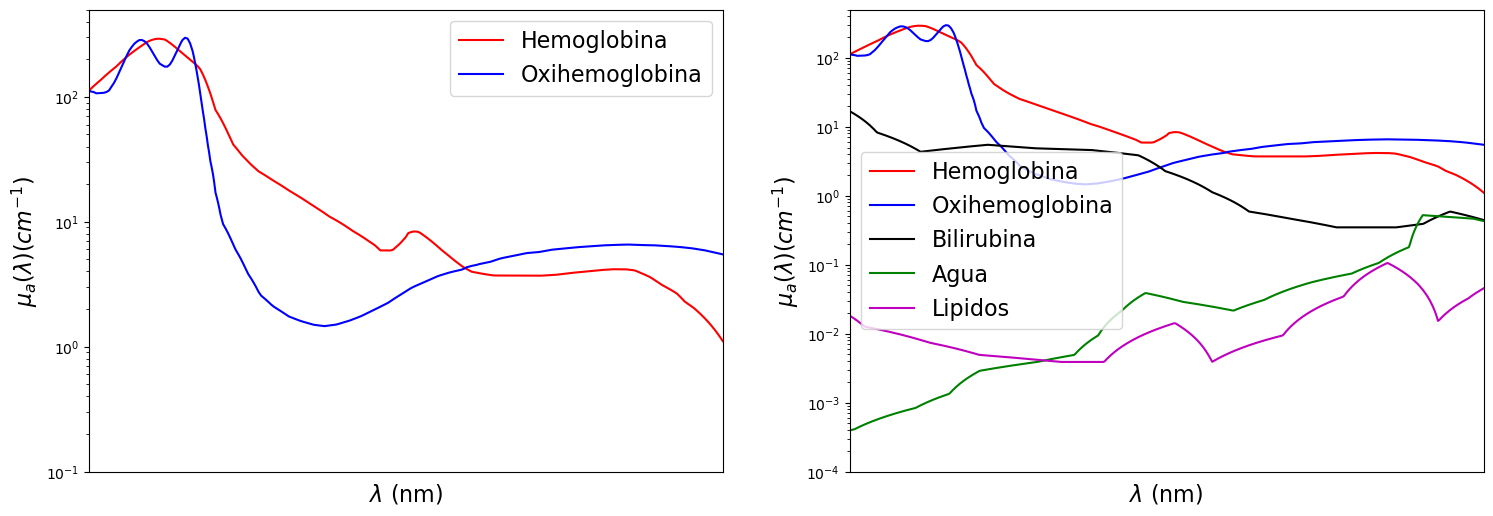

In [2]:
#--------------------------------------------------------------------------------------
fig = plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
plt.semilogy(landa, muHemo,'r',landa, muOxy,'b','linewidth',2)
plt.xlabel('$\lambda$ (nm)',fontsize=16);
plt.ylabel('$\mu_a(\lambda) (cm^{-1})$',fontsize=16);
plt.xlim(500, 1000)
plt.ylim(1e-1,500)
plt.legend(('Hemoglobina','Oxihemoglobina'),fontsize=16)
plt.subplot(1,2,2)
plt.semilogy(landa, muHemo,'r',landa, muOxy,'b',landa, muBilis,'k',landa, muAgua,'g',landa, muLipidos,'m', 'linewidth',2)
plt.xlabel(r'$\lambda$ (nm)',fontsize=16);
plt.ylabel('$\mu_a(\lambda) (cm^{-1})$',fontsize=16);
plt.xlim(500, 1000)
plt.ylim(1e-4,500)
plt.legend(('Hemoglobina','Oxihemoglobina', 'Bilirubina','Agua', 'Lipidos'),fontsize=16);

## 3. Coeficiente de absorcion de un tejido biológico
El coeficiente de absorción lineal de un tejido se puede expresar como una suma ponderada de los coeficientes de absorción de los componentes absorbentes del  tejido, a saber 

$$\mu(\lambda) = \sum_j f_j \mu^{(j)}(\lambda)$$

donde $f_j$ representa la fracción en volumen de la sustancia $j$.

Vamos a ver un ejemplo de cómo se calcula esta cantidad. La figura presenta una muestra un tumor en el hígado y el tejido sano circundante. Se trata de comparar el coeficiente de absorción lineal en la región de tejido sano con el valor en la región

![carne](figabsorcionscattering_2.png)

(a) Se asume que las sustancias absorbentes relevantes en el higado son la sangre, con una fración en volume $f_s$, la bilirrubina, con una fracción $f_B$ y el complejo agua-lipidos con una fración $f_{WL}$. A su vez, la sangre se compone de hemoglobina y oxihemoglobina, con una fraccion de oxigeno en sangre dada por $S$. Por otra parte, el complejo agua-lipidos se compone de una fracción de lípidos relativa al total de agua más lipidos, dado por $f_L$. Formular una expresión teórica del coeficiente de absorción total para el higado.

$$\mu_a(\lambda)= f_s\left[S\mu^{ox}_a(\lambda)+ (1-S)\mu^{Hem}_a(\lambda)\right]+ f_{B}\mu^{B}_a(\lambda)
+f_{WL}\left[f_L \mu^{L}_a(\lambda)+ (1-f_L)\mu^{Agua}_a(\lambda)\right]$$

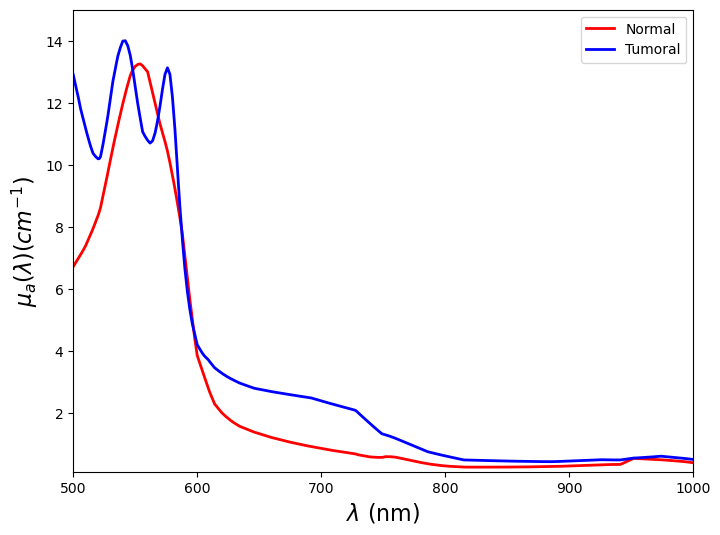

In [3]:
#Este programa representa los coeficientes de absorción
#de un tejido compuesto de varios cromóforos


#---------------Carga de ficheros de cromóforos--------------------
Hemo=np.loadtxt('muaHemo.dat');
Oxy=np.loadtxt('muaOxy.dat');
Bilis=np.loadtxt('muBilis.dat');
Agua=np.loadtxt('muAgua.dat');
Lipidos=np.loadtxt('muLipidos.dat');
#-------------------------------------------------------------------------
landa=Hemo[:,0]
muHemo=Hemo[:,1]
muOxy=Oxy[:,1]
muBilis=Bilis[:,1]
muAgua=Agua[:,1]
muLipidos=Lipidos[:,1]
#---------------------------------------------------------------------------

# -------Cálculo del coeficiente de absorción del  tejido-------------------
#
#-----Coeficientes del tejido normal---------------------------------------
fs=0.045; S=0.08; fWL=0.76; flip=0.16; fB=0.1;

muaTejidoNORMAL=fs*(S*muOxy+(1-S)*muHemo)+ fB*muBilis+fWL*(flip*muLipidos+(1-flip)*muAgua);

#----Coeficientes del tejido tumoral---------------------------------------
fs=0.04; S=0.65; fWL=0.76; flip=0.72; fB=0.5;

muaTejidoTUMOR=fs*(S*muOxy+(1-S)*muHemo)+ fB*muBilis+fWL*(flip*muLipidos+(1-flip)*muAgua);

#---- Representación de los coeficientes de los tejidos---------------------
fig = plt.figure(figsize=(8,6))
plt.plot(landa, muaTejidoNORMAL,'r',landa, muaTejidoTUMOR,'b',
         linewidth=2)
plt.xlabel('$\lambda$ (nm)',fontsize=16);
plt.ylabel('$\mu_a(\lambda) (cm^{-1})$',fontsize=16);
plt.xlim(500, 1000)
plt.ylim(1e-1,15)
plt.legend(('Normal','Tumoral'));

## 4. Scattering  en un tejido biológico

En un tejido biológico existen una gran variedad de estructuras (núcleos celuares células, fibras de colágeno, estructuras  lipídicas...) cuyos tamaños varían desde los nm hasta las  10 o 20 micras. 
![estructuras](figabsorcionscattering_3.png)

Ello hace que debamos formular un modelo de scattering que incluya el scattering Rayleigh

$$\mu'_s(\lambda)= a \left[f_R \left(\frac{\lambda}{\lambda_0} \right)^{-4 }  +(1-f_R) \left(\frac{\lambda}{\lambda_0} \right)^{-b }\right]$$

Vamos a representar el coeficiente de scattering reducido de los tejidos normal y tumoral en función de la longitud de onda para los datos de la tabla 

|  | a | b | f$_R$ |
|--|---|---|-------|
|T. Normal | 17 | 1.2 | 44 |
| T. Tumor | 10 | 0.5 | 57 |

In [4]:
#Este programa representa los coeficientes de scattering reducido de 
#dos tejidos, uno normal y otro tumoral
import numpy as np
import matplotlib.pyplot as plt


landa=np.linspace(500,1000,200);
landa_0=800;
#--------Tejido NORMAL--------------------
fR=0.574;
a=10;
b=0.5;
mu_sNORMAL=a*( fR*(1/(landa/landa_0))**4 + 
              (1-fR)*(1/(landa/landa_0))**b)

#--------Tejido TUMORAL--------------------
fR=0.44;
a=17;
b=1.2;
mu_sTUMORAL=a*( fR*(1/(landa/landa_0))**4 +
               (1-fR)*(1/(landa/landa_0))**b)

#----------------------------------------------------
fig = plt.figure(figsize=(8,6))
plt.plot(landa, mu_sNORMAL,'r',landa, mu_sTUMORAL,'b',
         linewidth=2)
plt.xlabel('$\lambda$ (nm)',fontsize=16);
plt.ylabel('$\mu_s(\lambda) (cm^{-1})$',fontsize=16);
plt.legend(('Normal','Tumoral'),fontsize=16);